<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/level1_ML_foundation_BCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alphawaves data,

subject 0

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat


- numpy for numerical computing
- pandas for data handling
- matplotlib for plotting and visualising
- seaborn for visualising
- scipy, loadmat for loading the .mat files


In [20]:
data_mat = loadmat('subject_00.mat')
# Assuming the signal data is stored under the key 'SIGNAL'
signal_data = data_mat['SIGNAL']

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(signal_data)

# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [40]:
data_mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 13 21:47:47 2018',
 '__version__': '1.0',
 '__globals__': [],
 'SIGNAL': array([[ 0.00000000e+00,  2.31471094e+03, -2.47386426e+03, ...,
         -3.27888818e+03,  0.00000000e+00,  0.00000000e+00],
        [ 1.95312500e-03,  2.31207739e+03, -2.47719287e+03, ...,
         -3.27667456e+03,  0.00000000e+00,  0.00000000e+00],
        [ 3.90625000e-03,  2.30813916e+03, -2.47775000e+03, ...,
         -3.26313354e+03,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.23244141e+02,  1.92760596e+03, -2.45507520e+03, ...,
         -3.27909985e+03,  0.00000000e+00,  0.00000000e+00],
        [ 1.23246094e+02,  1.93911743e+03, -2.44151099e+03, ...,
         -3.25797363e+03,  0.00000000e+00,  0.00000000e+00],
        [ 1.23248047e+02,  1.94014917e+03, -2.43970483e+03, ...,
         -3.24809204e+03,  0.00000000e+00,  0.00000000e+00]])}

What is the file format? (.csv, .mat, .edf?) - file is in .mat format
How is the data structured? (rows = samples, columns = channels?) - The data is structured as rows contain observation at each time sample and columns contains the recordings of EEG electrodes.
What is the sampling rate? - total number of samples/ total recording time in seconds;
How long is the recording?


In [24]:
df.shape

(63104, 19)

In [22]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,2314.710938,-2473.864258,304.726593,-6740.526367,-6507.790039,-11247.854492,-2859.524170,-14004.568359,-1706.199707,-4104.730469,-6290.920410,-12415.869141,-7290.736816,170.436508,397.110260,-3278.888184,0.0,0.0
1,0.001953,2312.077393,-2477.192871,295.271210,-6747.804199,-6508.391602,-11249.747070,-2863.340820,-14008.770508,-1708.395874,-4104.203613,-6288.968262,-12418.380859,-7293.556641,175.323837,400.196503,-3276.674561,0.0,0.0
2,0.003906,2308.139160,-2477.750000,292.862305,-6750.519043,-6510.719238,-11248.869141,-2867.504883,-14007.042969,-1709.802368,-4105.119141,-6274.008301,-12422.494141,-7294.418945,193.758057,410.232483,-3263.133545,0.0,0.0


In [25]:
df.columns

RangeIndex(start=0, stop=19, step=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63104 non-null  float64
 1   1       63104 non-null  float64
 2   2       63104 non-null  float64
 3   3       63104 non-null  float64
 4   4       63104 non-null  float64
 5   5       63104 non-null  float64
 6   6       63104 non-null  float64
 7   7       63104 non-null  float64
 8   8       63104 non-null  float64
 9   9       63104 non-null  float64
 10  10      63104 non-null  float64
 11  11      63104 non-null  float64
 12  12      63104 non-null  float64
 13  13      63104 non-null  float64
 14  14      63104 non-null  float64
 15  15      63104 non-null  float64
 16  16      63104 non-null  float64
 17  17      63104 non-null  float64
 18  18      63104 non-null  float64
dtypes: float64(19)
memory usage: 9.1 MB


<Axes: >

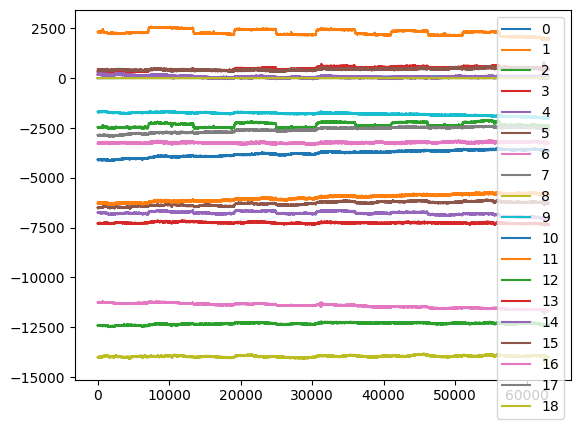

In [37]:
df.plot()